# Transpose Convolution

## Importing Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

# !pip install tensorflow==2.16.2
# !pip install matplotlib 

import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D 
import numpy as np 
import matplotlib.pyplot as plt 

## 1 Define the input layer

Assume we are working with an input image of size 28x28 with 1 channel (grayscale).

In [2]:
input_layer = Input(shape=(28, 28, 1))

## 2 Add Convolutional and Transpose Convolutional Layers

用法：
一个卷积层，然后用同样的kernel_size和padding，将卷积层的结果转置，得到反卷积层，跟在卷积层后面。

- `Conv2D(filters, kernal_size, activation, padding)(input_layer)`
- `Conv2DTranspose(filters, kernel_size, activation, padding)(conv_layer))`



In [4]:
# A Convolution layer with 32 filters of (3,3) kernel size, ReLU activation, and same padding
conv_layer = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(input_layer)

# - Followed by a Transposed Convolution layer with 1 filter and (3,3) kernel size for reconstructing the image
# use the same kernel size and padding as the conv layer
t_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(conv_layer)

## 3 Create the model

In [5]:
model = Model(inputs=input_layer, outputs=t_conv_layer)

## 4 Compile the model

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')

## 5 Train the model

In [21]:
X_train = np.random.rand(1000, 28, 28, 1)  # Example training data
y_train = X_train                          # For reconstruction, the target is the input 

X_test = np.random.rand(200, 28, 28, 1)
y_test = X_test

In [22]:
fittedmodel = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2)

Epoch 1/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0106 - val_loss: 0.0033
Epoch 2/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 3/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 5/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0027


In [23]:
fittedmodel.history

{'loss': [0.007657412439584732,
  0.0031825662590563297,
  0.0028362064622342587,
  0.002770256483927369,
  0.00273713655769825,
  0.0027042869478464127,
  0.002668140223249793],
 'val_loss': [0.003276563249528408,
  0.002978476695716381,
  0.002796243643388152,
  0.0027621008921414614,
  0.002736408729106188,
  0.0026978037785738707,
  0.002656095428392291]}

## 6 Evaluate the model

In [26]:
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 
Loss: 0.002633659867569804


## 7 Visualization

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


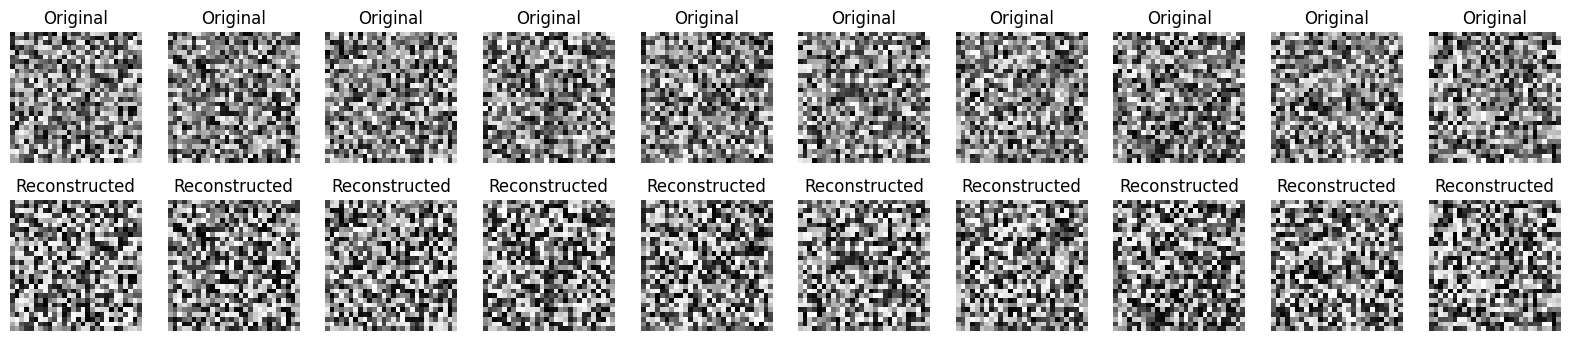

In [15]:
predictions = model.predict(X_test)

n = 10  # samples to display

plt.figure(figsize=(20,4))

for i in range(n):
    ax=plt.subplot(2, n, i+1)   # (nrows, ncols, index)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(predictions[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

---

## Try with different kernel sizes

In [19]:
# Write your code here

# input_layer has been defined already

# conv
conv_layer_1 = Conv2D(filters=32, kernel_size=(8,8), activation='relu',padding='same')(input_layer)

# transpose conv
transp_conv_layer_1 = Conv2DTranspose(filters=1, kernel_size=(8,8), activation='sigmoid', padding='same')(conv_layer_1)

model = Model(inputs=input_layer, outputs=transp_conv_layer_1)

model.compile(loss='mean_squared_error', optimizer='adam')

fitmodel = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_batch_size=0.2)

loss = model.evaluate(X_test, y_test)
print(f"Evaluation - Loss: {loss}")



Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0641 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 
Evaluation - Loss: 0.002862879540771246


## Add Dropout layers

In [ ]:
from tensorflow.keras.layers import Dropout

input_layer = Input(shape=(28,28,1))
conv_layer_2 = Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same')(input_layer)
dropout = Dropout(rate=0.5)(conv_layer_2)
transp_conv_layer_2 = Conv2DTranspose(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(dropout)

model = Model(inputs=input_layer, outputs=transp_conv_layer_2)

model.compile(loss='mean_squared_error', optimizer='adam')

fitmodel = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f"Evaluation - Loss: {loss}")

Epoch 1/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0796 - val_loss: 0.0598
Epoch 2/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0558 - val_loss: 0.0378
Epoch 3/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367 - val_loss: 0.0220
Epoch 4/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - val_loss: 0.0131
Epoch 5/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - val_loss: 0.0088
Epoch 6/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0067
Epoch 7/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0055
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 
Evaluation - Loss: 0.005479823332279921
